# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = merged_mouse_data['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_mouse_data[merged_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_mouse_data[merged_mouse_data['Mouse ID'] != 'g989']
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = cleaned_df['Mouse ID'].nunique()
mice_count2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_stddev = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sample_size = cleaned_df.groupby('Drug Regimen').size()
drug_sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std() / sample_size.pow(0.5)
stats_df = pd.concat([drug_mean, drug_median, drug_variance, drug_stddev, drug_sem], axis=1)
stats_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

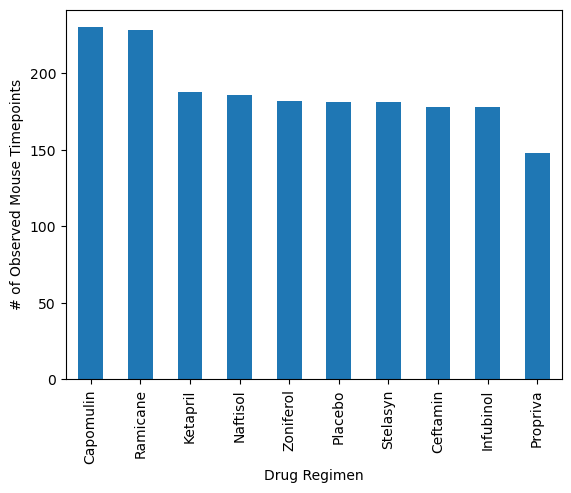

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = cleaned_df.groupby('Drug Regimen')['Timepoint'].count()
sorted_timepoints = timepoints.sort_values(ascending=False)
sorted_timepoints.plot(
    kind='bar',
    xlabel='Drug Regimen',
    ylabel='# of Observed Mouse Timepoints',
    rot=90
)

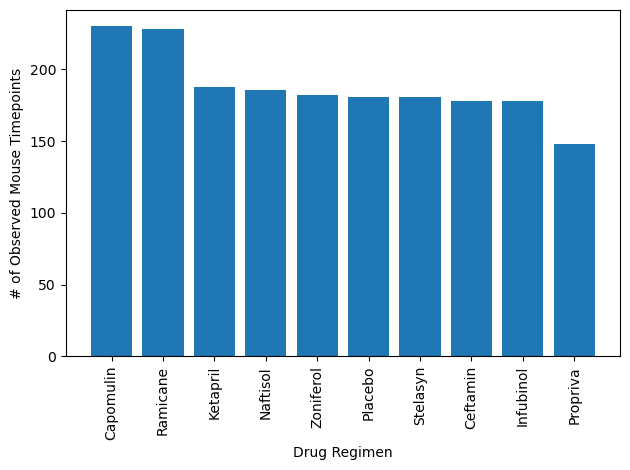

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(sorted_timepoints.index, sorted_timepoints.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

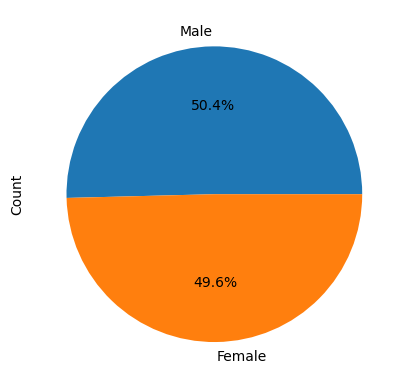

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_count = cleaned_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()
sex_count

# Make the pie chart
sex_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    ylabel='Count'
)

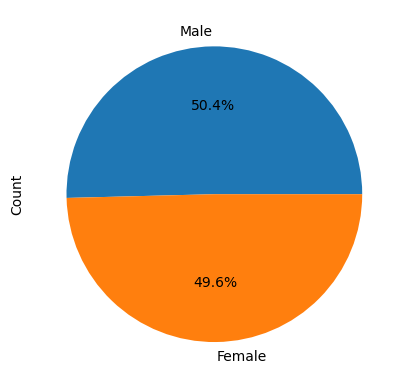

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(sex_count,
        labels=sex_count.index,
        autopct='%1.1f%%')
plt.ylabel('Count')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume = pd.merge(max_time, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
final_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    #outliers = []
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_data = final_volume.loc[final_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'].astype(float)

    # add subset
    tumor_volumes[treatment] = tumor_volume_data.tolist()
    tumor_series = pd.Series(tumor_volume_data)

    # Determine outliers using upper and lower bounds
    lowerq = tumor_volume_data.quantile(0.25)
    upperq = tumor_volume_data.quantile(0.75)
    iqr = lowerq - upperq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)


    outliers = tumor_series[
        (tumor_series > lower_bound) |
        (tumor_series < upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: 80     47.685963
121    28.430964
162    46.539206
174    23.343598
226    28.484033
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 96     22.050126
157    45.220869
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: 27     72.226731
31     36.321346
123    47.010364
142    45.699331
197    46.250112
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<Axes: ylabel='Final Tumor Volume (mm3)'>

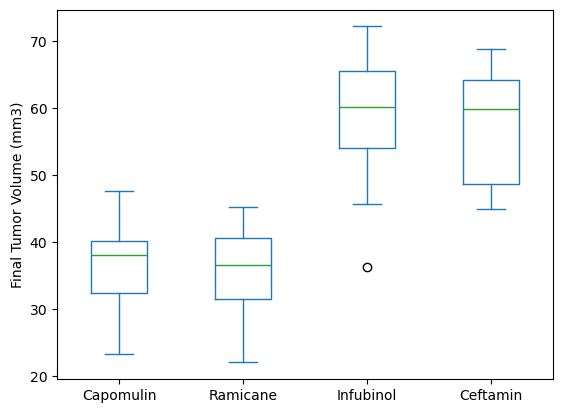

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volumes_df = pd.DataFrame(tumor_volumes)
tumor_volumes_df
tumor_volumes_df.plot(
    kind='box',
    ylabel='Final Tumor Volume (mm3)'
)

## Line and Scatter Plots

In [16]:
# Get Mouse ID's for Capomulin
capomulin_mice = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_id = capomulin_mice['Mouse ID'].unique()
capomulin_id

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

<Axes: xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

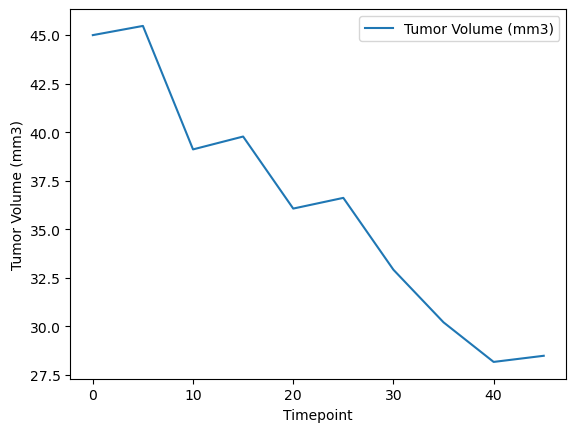

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = capomulin_mice[capomulin_mice['Mouse ID'] == 'x401']
single_mouse.plot(
    kind='line',
    x='Timepoint',
    y='Tumor Volume (mm3)',
    xlabel='Timepoint',
    ylabel='Tumor Volume (mm3)'
)

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

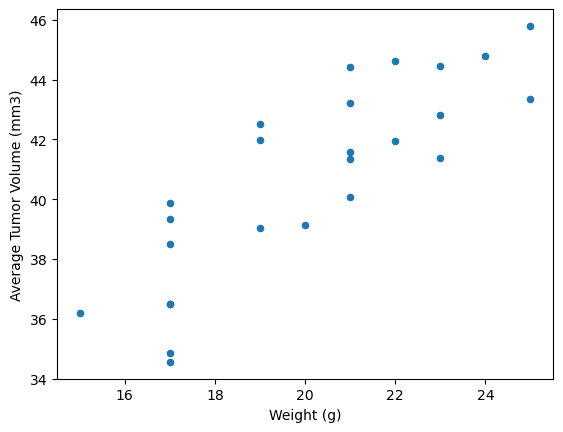

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
averages = capomulin_mice.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()
averages.plot(
    kind='scatter',
    x='Weight (g)',
    y='Tumor Volume (mm3)',
    xlabel='Weight (g)',
    ylabel='Average Tumor Volume (mm3)'
)

## Correlation and Regression

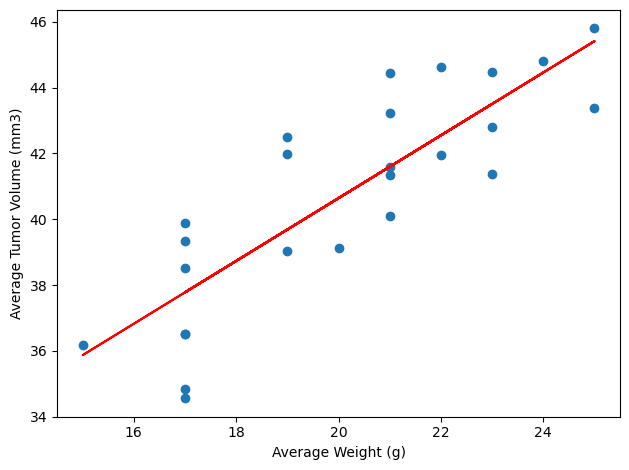

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_weight = averages.iloc[:,0]
avg_volume = averages.iloc[:,1]
correlation = st.pearsonr(avg_weight, avg_volume)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_volume)
regression = avg_weight * slope + intercept
plt.scatter(avg_weight, avg_volume)
plt.plot(avg_weight, regression, 'r-')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()